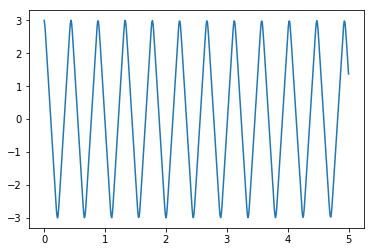

n for which |bn/b1|<0.1 =  28


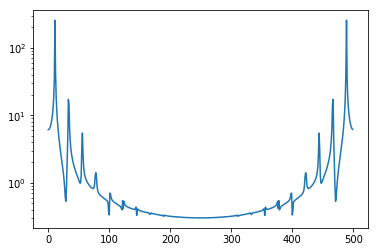

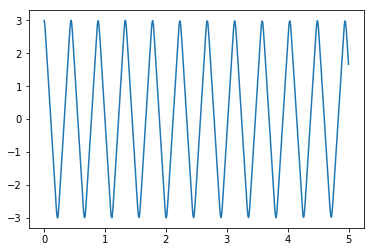

In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
a = 0.
b = 5.0
n = 500                                        
ydumb = np.zeros((2), float)   
y = np.zeros((2), float)
fReturn = np.zeros((2), float)  
k1 = np.zeros((2), float)
k2 = np.zeros((2), float)   
k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 3.
y[1] = -5.
t = a
h = (b-a)/n
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                           
    fReturn[1] = -0.01*y[0]**11    
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
plt.plot(xp,yp)
plt.show()

N = 500;                  
Np = N                           
signal = yp
twopi  = 2.*pi;       
sq2pi = 1./sqrt(twopi);         
h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 
b1 = complex(0.0, 0.0) 
c = 0
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)
      if(n==0):
          b1 = zsum
          c=1
      if(n!=0 and c==1):
          if((sqrt(zsum.real**2+zsum.imag**2)/sqrt(b1.real**2+b1.imag**2))<0.1):
              print("n for which |bn/b1|<0.1 = ", n)
              c = 2
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
      
fourier(dftz)              # Call signal, transform
plt.plot(nplot,fplot)
plt.yscale('log')
plt.show()

signal=dftz
dftz   = zeros( (Np), complex ) 
fplot = zeros( N, float ) 
def fourierinv(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(zexpo)           
      dftz[n] = zsum / sq2pi    
      fplot[n] = dftz[n].real/N
fourierinv(dftz)              # Call signal, transform
x = np.linspace(0,5,500)
plt.plot(x,fplot)
plt.show()